# Dimensionality Reduction Assignments

## 1. Applying PCA

In [1]:
# 1. Read in the student grades data set
import pandas as pd
data = pd.read_csv('../Data/student_grades.csv')
data.head()

,student_id,math,science,cs,band,english,history,spanish,physed
0,1,46,48,50,74,34,44,39,73
1,2,66,65,65,66,74,80,75,63
2,3,55,53,50,76,71,72,76,71
3,4,53,57,53,80,77,77,85,82
4,5,55,62,58,67,82,77,78,60


In [2]:
# 2. Drop the first column with student_id
data = data.iloc[:, 1:]

In [3]:
data

,math,science,cs,band,english,history,spanish,physed
0,46,48,50,74,34,44,39,73
1,66,65,65,66,74,80,75,63
2,55,53,50,76,71,72,76,71
3,53,57,53,80,77,77,85,82
4,55,62,58,67,82,77,78,60
...,...,...,...,...,...,...,...,...
95,87,82,87,61,81,85,90,65
96,45,45,43,73,46,50,44,69
97,30,33,36,64,41,46,47,67
98,46,47,41,71,48,44,50,63


In [4]:
# 3. Center the data
data_centered = data - data.mean()
data_centered

,math,science,cs,band,english,history,spanish,physed
0,-7.05,-5.22,-2.75,3.96,-26.97,-19.6,-26.56,5.39
1,12.95,11.78,12.25,-4.04,13.03,16.4,9.44,-4.61
2,1.95,-0.22,-2.75,5.96,10.03,8.4,10.44,3.39
3,-0.05,3.78,0.25,9.96,16.03,13.4,19.44,14.39
4,1.95,8.78,5.25,-3.04,21.03,13.4,12.44,-7.61
...,...,...,...,...,...,...,...,...
95,33.95,28.78,34.25,-9.04,20.03,21.4,24.44,-2.61
96,-8.05,-8.22,-9.75,2.96,-14.97,-13.6,-21.56,1.39
97,-23.05,-20.22,-16.75,-6.04,-19.97,-17.6,-18.56,-0.61
98,-7.05,-6.22,-11.75,0.96,-12.97,-19.6,-15.56,-4.61


In [5]:
# 4. Fit a PCA model with 2 components
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(data_centered)


,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [6]:
# 5. View and interpret the explained variance ratios
pca2.explained_variance_ratio_

array([0.81844937, 0.09778153])

## 2. Interpreting PCA 

In [7]:
# 1. View and interpret the components of the PCA model
pca2.components_

array([[ 0.34433892,  0.34662586,  0.32733313, -0.00417335,  0.45552196,
         0.46095972,  0.48354746,  0.01773586],
       [ 0.45069884,  0.44923506,  0.47433583,  0.096715  , -0.33260806,
        -0.31949261, -0.35110809,  0.15725648]])

In [8]:
data_centered.columns

Index(['math', 'science', 'cs', 'band', 'english', 'history', 'spanish',
       'physed'],
      dtype='object')

* PC1 - More math, science, cs, english, history, spanish
* PC2 - More band and physed

In [9]:
data_centered

,math,science,cs,band,english,history,spanish,physed
0,-7.05,-5.22,-2.75,3.96,-26.97,-19.6,-26.56,5.39
1,12.95,11.78,12.25,-4.04,13.03,16.4,9.44,-4.61
2,1.95,-0.22,-2.75,5.96,10.03,8.4,10.44,3.39
3,-0.05,3.78,0.25,9.96,16.03,13.4,19.44,14.39
4,1.95,8.78,5.25,-3.04,21.03,13.4,12.44,-7.61
...,...,...,...,...,...,...,...,...
95,33.95,28.78,34.25,-9.04,20.03,21.4,24.44,-2.61
96,-8.05,-8.22,-9.75,2.96,-14.97,-13.6,-21.56,1.39
97,-23.05,-20.22,-16.75,-6.04,-19.97,-17.6,-18.56,-0.61
98,-7.05,-6.22,-11.75,0.96,-12.97,-19.6,-15.56,-4.61


<Axes: xlabel='PC1', ylabel='PC2'>

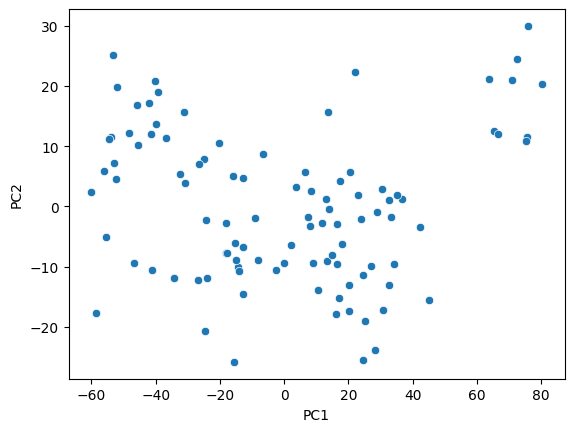

In [10]:
# 2. Plot the students on a scatter plot with the x-axis as PC 1 and the y-axis as PC 2
data_pca = pd.DataFrame(pca2.transform(data_centered), columns= ['PC1', 'PC2'])
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'PC1', y = 'PC2', data = data_pca)


In [ ]:
# 3. Interpret the clusters of students that you see and make recommendations for the guidance counselor


## 3. T-SNE

In [11]:
# 1. Fit a t-SNE model with 2 components
from sklearn.manifold import TSNE

tsne2 = TSNE(n_components=2, random_state=42)

data_tsne = tsne2.fit_transform(data)
data_tsne

array([[ 7.2404373e-01,  6.7151995e+00],
       [ 1.3251818e+00, -4.9985065e+00],
       [ 7.4584037e-02, -2.5255175e+00],
       [-8.7679583e-01, -3.9358585e+00],
       [ 1.8012743e+00, -4.1542845e+00],
       [-6.5696436e-01,  7.5423641e+00],
       [ 2.8163171e-01, -5.5776367e+00],
       [ 2.9723325e-01,  2.4030154e+00],
       [-9.2553467e-01,  4.8072381e+00],
       [ 1.3588905e+00, -7.3574343e+00],
       [ 4.4931096e-01,  7.9450722e+00],
       [ 6.6274977e-01, -2.3984752e+00],
       [ 2.2138138e+00, -2.6825581e+00],
       [-3.7973070e-01, -2.9049900e+00],
       [ 1.1926130e+00, -1.4888954e+00],
       [-1.9583166e-01,  7.7145619e+00],
       [-7.3983574e-01, -2.6922987e+00],
       [ 2.3954687e+00, -3.6448262e+00],
       [-2.1238302e-01, -4.8278146e+00],
       [-4.6430743e-01,  7.2005987e+00],
       [-2.0811604e-01, -4.6112089e+00],
       [ 6.5087175e-01, -3.3723142e+00],
       [ 9.1475323e-03,  2.7489903e+00],
       [-6.9742513e-01, -3.3530822e+00],
       [ 1.81390

<Axes: xlabel='c1', ylabel='c2'>

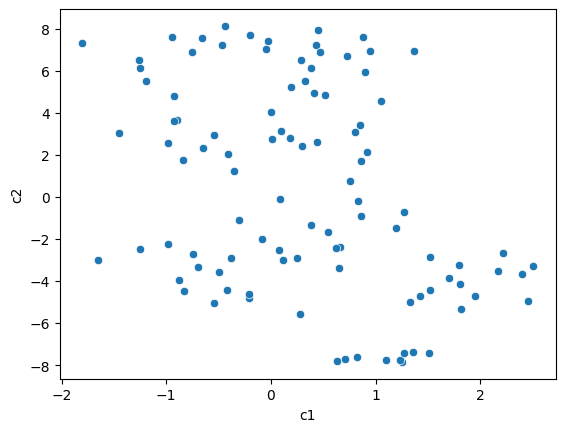

In [12]:
# 2. Plot the students on a scatter plot with the x-axis as component 1 and the y-axis as component 2
df_tsne = pd.DataFrame(data_tsne, columns = ['c1', 'c2'])
sns.scatterplot(x = 'c1', y ='c2', data = df_tsne)

In [ ]:
# 3. Interpret the data you see on the plot


## 4. T-SNE with Colors

In [14]:
# 1. Fit a KMeans model with 3 clusters
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3, n_init = 'auto', random_state=42)
kmeans3.fit(data)
cluster_center3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns)
cluster_center3

,math,science,cs,band,english,history,spanish,physed
0,57.113636,57.795455,56.386364,70.681818,71.886364,74.795455,77.181818,68.522727
1,42.702128,42.765957,43.042553,69.765957,45.765957,47.957447,49.234043,66.574468
2,87.222222,85.444444,85.666667,68.333333,87.000000,90.555556,94.000000,68.555556


In [16]:
cluster_centers = kmeans3.cluster_centers_
labels = kmeans3.labels_

In [15]:
# 2. Overlay the 3 clusters onto a T-SNE plot
from sklearn.manifold import TSNE

tsne2 = TSNE(n_components=2, random_state=42)

data_tsne = tsne2.fit_transform(data)
data_tsne

array([[ 7.2404373e-01,  6.7151995e+00],
       [ 1.3251818e+00, -4.9985065e+00],
       [ 7.4584037e-02, -2.5255175e+00],
       [-8.7679583e-01, -3.9358585e+00],
       [ 1.8012743e+00, -4.1542845e+00],
       [-6.5696436e-01,  7.5423641e+00],
       [ 2.8163171e-01, -5.5776367e+00],
       [ 2.9723325e-01,  2.4030154e+00],
       [-9.2553467e-01,  4.8072381e+00],
       [ 1.3588905e+00, -7.3574343e+00],
       [ 4.4931096e-01,  7.9450722e+00],
       [ 6.6274977e-01, -2.3984752e+00],
       [ 2.2138138e+00, -2.6825581e+00],
       [-3.7973070e-01, -2.9049900e+00],
       [ 1.1926130e+00, -1.4888954e+00],
       [-1.9583166e-01,  7.7145619e+00],
       [-7.3983574e-01, -2.6922987e+00],
       [ 2.3954687e+00, -3.6448262e+00],
       [-2.1238302e-01, -4.8278146e+00],
       [-4.6430743e-01,  7.2005987e+00],
       [-2.0811604e-01, -4.6112089e+00],
       [ 6.5087175e-01, -3.3723142e+00],
       [ 9.1475323e-03,  2.7489903e+00],
       [-6.9742513e-01, -3.3530822e+00],
       [ 1.81390

<Axes: xlabel='c1', ylabel='c2'>

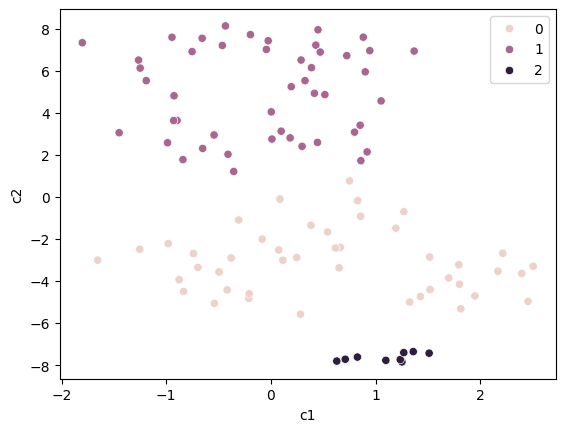

In [17]:
df_tsne = pd.DataFrame(data_tsne, columns = ['c1', 'c2'])
sns.scatterplot(x = 'c1', y ='c2', data = df_tsne, hue = labels)

<Axes: >

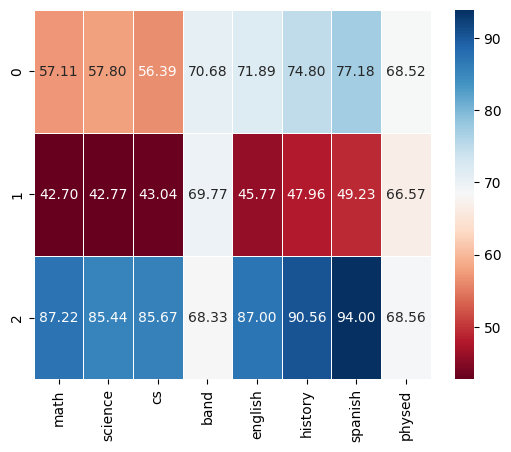

In [18]:
# 3. Interpret the cluster centers
sns.heatmap(cluster_center3, annot=True, cmap="RdBu", fmt=".2f", linewidths=.5)
